In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary
from pysindy.differentiation import FiniteDifference
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
from pysindy.feature_library import CustomLibrary
import math
import pysindy.feature_library

In [1]:
!pip install pysindy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.0/121.0 kB 5.0 MB/s eta 0:00:00


In [2]:
!pip install --force-reinstall numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
blosc2 3.3.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.2

In [7]:
def logistic_growth_controlled(y, t, params, treatment_function, cycles):
    """
    Differential equation for logistic growth with a control term for Leukemic stem cells in active

    Args:
        y (float): Current population size.
        t (float): Current time.
        params (array float): array with parameter values.
        treatment_function : A function that takes time and cycles (t, cycle) and returns  u in {0,1}  ( 0 means no treatment and 1 treatment).
        cycles : treatment cycles

    Returns:
        float: The rate of change of the population size (dy/dt).
    """
    control = treatment_function(t,cycles)
    p_l, K_A, d_k, c = params
    dydt = ( p_l * (1 - y / K_A) - c*control -d_k ) * y
    # =p_l * y -(pl/KA)*y^2-c*control*y-dk*y=-(pl/KA)y^2+(pl-c*control-dk)*y
    return dydt

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
## This is how we read the treatment data for a patient
def treatment_cycle( patient_id ) :

    #patient_id = 104
    # read all data.  [[ Boris ]] Its inefficient to read all data here; but we can optimize this later
    chemo_data = pd.read_csv('gdrive/My Drive/rsif20200091_si_003.csv')
    # get treatment information from a specific patient
    chemo_row = chemo_data[chemo_data.PatientID==patient_id].iloc[0]

    chemo_start_times = [int(x) for x in chemo_row['Chemo_begin'].split()] # starting times of therapy cycle
    chemo_end_times = [int(x) for x in chemo_row['Chemo_end'].split()] #

    return   [ chemo_start_times , chemo_end_times ]    ## [[ Boris ]] we may need a better data structure here


In [10]:
# Define a control function (example: constant control after a certain time)
def treatment_function(time, cycles ):

    chemo_start_times, chemo_end_times  = cycles

    Ncycles = len(chemo_start_times)

    for i in range(Ncycles) :
        if chemo_start_times[i] <= time <= chemo_end_times[i]  :
            return 1.0  # Apply 60% control

    return 0.0  # No control


## Run a Simulation

In [11]:
## Seting parameters for simulations
p_l = 0.11337807
K_A = 10000
d_k = 1/30
c = 1.2114013

# Initial value
La_o = 10000*.10

t = np.linspace(0, 500, 501) # Time points

In [12]:
## Generate a trajectory with patient control

# determine treatment cycles
## This is how we read the treatment data for a patient
patient_id = 104
cycles = treatment_cycle( patient_id )

# names of the parameters to fit
params = [p_l, K_A, d_k, c]

results = odeint(logistic_growth_controlled, La_o , t, args=(params, treatment_function, cycles))
print(results)


[[1.00000000e+03]
 [3.20420159e+02]
 [1.03141691e+02]
 [3.32497460e+01]
 [1.07237919e+01]
 [3.45919328e+00]
 [1.11589355e+00]
 [1.20887121e+00]
 [1.30959445e+00]
 [1.41870827e+00]
 [1.53691135e+00]
 [1.66496047e+00]
 [1.80367539e+00]
 [1.95394404e+00]
 [2.11672819e+00]
 [2.29306957e+00]
 [2.48409651e+00]
 [2.69103112e+00]
 [2.91519704e+00]
 [3.15802776e+00]
 [1.01874320e+00]
 [3.28639542e-01]
 [1.06017354e-01]
 [3.42006826e-02]
 [1.10329798e-02]
 [3.55920824e-03]
 [3.85580812e-03]
 [4.17713375e-03]
 [4.52523719e-03]
 [4.90234998e-03]
 [5.31088963e-03]
 [5.75347515e-03]
 [6.23294475e-03]
 [6.75237202e-03]
 [7.31508441e-03]
 [7.92469051e-03]
 [8.58509831e-03]
 [9.30054075e-03]
 [1.00756049e-02]
 [1.09152596e-02]
 [1.18248875e-02]
 [1.28103208e-02]
 [1.38778748e-02]
 [1.50343932e-02]
 [1.62872916e-02]
 [1.76445990e-02]
 [1.91150181e-02]
 [2.07079761e-02]
 [2.24336813e-02]
 [2.43031997e-02]
 [2.63285153e-02]
 [2.85226077e-02]
 [3.08995471e-02]
 [3.34745682e-02]
 [3.62641755e-02]
 [3.928625

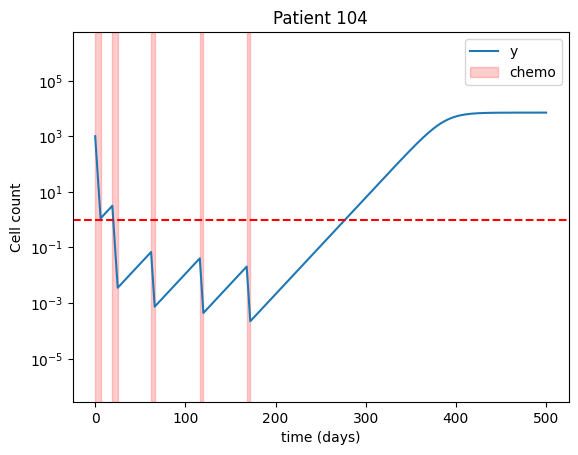

In [13]:
# plot a simple simulation
fig, ax = plt.subplots()
chemo_start_times, chemo_end_times = cycles
plt.plot(t, results, label='y')
plt.yscale('log')

for i, (start, end) in enumerate(zip(chemo_start_times, chemo_end_times)):
    label = None
    # the reason for the i=0 is so that we only have one thing in the legend, rather than a separate legend for every cycle.
    if i == 0:
        label = 'chemo'
    plt.fill_between([start, end], 0, 1, alpha=0.2, color='red',
                        label=label, transform=ax.get_xaxis_transform())
### Added This Part ###
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title(f'Patient {patient_id}')
plt.xlabel('time (days)')
plt.ylabel('Cell count')
plt.legend()
plt.show()

In [14]:
#using SINDy for one trajectory of hoffman

control_values=[]
num_rows,num_col=results.shape
print(num_rows)

for time in t:
      control_values.append(treatment_function(time,cycles)) #get the control values for each time point
print(results.shape)

results=np.array(results)
control_values=np.array(control_values)




#goal is to solve X'=Theta(X)*Xi for Xi

#Data matrices (X) (one includes c, once does not)
#data_c=np.stack((results, control_values), axis=-1) # data includes control
data=results
data_c=np.c_[results,control_values] #adds control_values as a second column

print(control_values.shape)
print(data_c.shape)

#Derivatives X'
fd=FiniteDifference()
data_prime=fd._differentiate(results,t) #derivative does not include c, X'
print("The size of X' is ", data_prime.shape)



#Libraries (Theta(X))
theta_lib_c=PolynomialLibrary(degree=2) #restrict to polynomials of deg 2
functions = [lambda x : x, lambda x : x*x, lambda x ,y : x*y]
customlib=CustomLibrary(library_functions=functions)

customlib.fit(data_c) #fit to our data
print(customlib.get_feature_names())
theta_c=customlib.transform(data_c) #transform to the correct size (,5)
print("The size of theta_c is", theta_c.shape)

#solve X'=Theta(X)*Xi for Xi
#use least squares solution as initial guess
Xi=np.linalg.lstsq(theta_c,data_prime)[0] #Is our initial guess using Python's least squares solver
print("Xi is ", Xi)

Xi_row,Xi_col=Xi.shape
print(Xi_row)
print(Xi_col)



Lambda=0.000000000001 #Sparsification knob (this was the value given in the PNAS paper for Lorenz)
            #This loop is adapted from the Sindy_PNAS paper, SI Appendix and converted into Python
for k in range(1000):
  smallinds=(np.absolute(Xi)<Lambda) #find all "very small" coefficients
               #print(smallinds)
  Xi[smallinds]=0 #set them=0
            #print(Eps_P)
  for ind in range(Xi_col): #5 is the number of state variables
     biginds=np.logical_not(smallinds[:,ind]) #regress dynamics onto remaining terms
     Xi[biginds,ind]=np.linalg.lstsq(theta_c[:,biginds],data_prime[:,ind])[0]
print(Xi)

print(Xi.shape)

#print(results)

501
(501, 1)
(501,)
(501, 2)
The size of X' is  (501, 1)
['f0(x0)', 'f0(x1)', 'f1(x0)', 'f1(x1)', 'f2(x0,x1)']
The size of theta_c is (501, 5)
Xi is  [[ 7.99710113e-02]
 [-2.89645013e+00]
 [-1.13266708e-05]
 [-2.89645013e+00]
 [-1.02266038e+00]]
5
1
[[ 7.99710113e-02]
 [-2.89645013e+00]
 [-1.13266708e-05]
 [-2.89645013e+00]
 [-1.02266038e+00]]
(5, 1)


<__array_function__ internals>:180: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [ ]:
print(theta_c)

[[1.00000000e+03 1.00000000e+06]
 [3.20420159e+02 1.02669078e+05]
 [1.03141691e+02 1.06382085e+04]
 ...
 [7.05894560e+03 4.98287130e+07]
 [7.05902547e+03 4.98298406e+07]
 [7.05909920e+03 4.98308815e+07]]


In [20]:
def recovered_model(y, t, params, treatment_function, cycles):
    """
    Differential equation for model recovered by SINDy

    Args:
        y (float): Current population size.
        t (float): Current time.
        params (array float): array with parameter values.


    Returns:
        float: The rate of change of the population size (dy/dt).
    """
    control = treatment_function(t,cycles)
    a0,a1,a2,a3,a4=params
    dydt = a1*y+a2*control+a3*y*y+a4*control*control+a5*y*control

    return dydt

In [22]:
a1=Xi[0]
a2=Xi[1]
a3=Xi[2]
a4=Xi[3]
a5=Xi[4]
params=[a1,a2,a3,a4,a5]
results_hat = odeint(recovered_model, La_o , t, args=(params,treatment_function,cycles))
print(results_hat)
MSE = np.square(np.subtract(results[:,0],results_hat[:,0])).mean()
print(MSE)

[[ 1.00000000e+003]
 [ 3.83010004e+002]
 [ 1.45050706e+002]
 [ 5.27002397e+001]
 [ 1.67728255e+001]
 [ 2.78271365e+000]
 [-2.66702100e+000]
 [-2.88915647e+000]
 [-3.12980176e+000]
 [-3.39050061e+000]
 [-3.67292584e+000]
 [-3.97889006e+000]
 [-4.31035745e+000]
 [-4.66945654e+000]
 [-5.05849377e+000]
 [-5.47996888e+000]
 [-5.93659093e+000]
 [-6.43129599e+000]
 [-6.96726620e+000]
 [-7.54795069e+000]
 [-6.69196632e+000]
 [-6.35844182e+000]
 [-6.22848902e+000]
 [-6.17785502e+000]
 [-6.15812632e+000]
 [-6.15043946e+000]
 [-6.66298162e+000]
 [-7.21827973e+000]
 [-7.81990804e+000]
 [-8.47174089e+000]
 [-9.17797817e+000]
 [-9.94317297e+000]
 [-1.07722615e+001]
 [-1.16705958e+001]
 [-1.26439791e+001]
 [-1.36987044e+001]
 [-1.48415966e+001]
 [-1.60800578e+001]
 [-1.74221173e+001]
 [-1.88764852e+001]
 [-2.04526120e+001]
 [-2.21607525e+001]
 [-2.40120354e+001]
 [-2.60185405e+001]
 [-2.81933814e+001]
 [-3.05507968e+001]
 [-3.31062503e+001]
 [-3.58765389e+001]
 [-3.88799123e+001]
 [-4.21362034e+001]


<ipython-input-22-3f97000562b5>:7: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  results_hat = odeint(recovered_model, La_o , t, args=(params,treatment_function,cycles))
<ipython-input-22-3f97000562b5>:9: RuntimeWarning: overflow encountered in square
  MSE = np.square(np.subtract(results[:,0],results_hat[:,0])).mean()


In [ ]:
#Libraries (Theta(X))
theta_lib_c=PolynomialLibrary(degree=2) #restrict to polynomials of deg 2
functions = [lambda x : x, lambda x : x*x]
customlib=CustomLibrary(library_functions=functions)

sindy_model = ps.SINDy(feature_library=customlib,feature_names=["hq"],optimizer=ps.STLSQ(threshold=Lambda))
#sindy_model = ps.SINDy(feature_names=["hq", "ha", "lq", "la"],optimizer=ps.SR3)
sindy_model.fit(data, t)
sindy_model.print()
C= sindy_model.coefficients()
print(C)
print(Xi)


(hq)' = 0.070 f0(hq)
[[ 6.95426683e-02 -9.78585030e-06]]
[[ 6.95426683e-02]
 [-9.78585030e-06]]


In [ ]:
a=C[0,0]
b=C[0,1]
params=[a,b]
results_hat = odeint(recovered_model, La_o , t, args=(params,))
MSE = np.square(np.subtract(results[:,0],results_hat[:,0])).mean()
print(MSE)

33753095.90328251


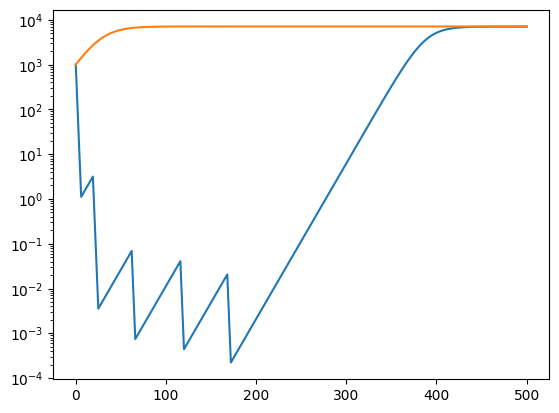

In [ ]:
# plot a simple simulation
fig, ax = plt.subplots()
chemo_start_times, chemo_end_times = cycles
plt.plot(t, results, label='y')
plt.plot(t, results_hat, label='y_hat')
plt.yscale('log')

In [ ]:
# determine treatment cycles
cycles = [ [],[] ] # we provide empty treatment cycles

# names of the parameters to fit
params = [p_l, K_A, d_k, c]
## This is how we read the treatment data for a patient

results = odeint(logistic_growth_controlled, La_o , t, args=(params, treatment_function, cycles))

In [ ]:
#using SINDy for one trajectory of hoffman

control_values=[]

num_rows,num_col=results.shape
print(num_rows)
for time in t:
      control_values.append(treatment_function(time,cycles))
print(results.shape)

control_values=np.reshape(control_values,(len(control_values),1))
print(control_values.shape)




#goal is to solve X'=Theta(X)*Xi for Xi

#Data matrices (X) (one includes c, once does not)
#data_c=np.stack((results, control_values), axis=-1) # data includes control
data=results
data_c=[results,control_values]
#data=np.stack((results), axis=-1) #The actual data does not include control
#data=results



#Derivatives X'
fd=FiniteDifference()
data_prime=fd._differentiate(results,t) #derivative does not include c, X'



#Libraries (Theta(X))
theta_lib_c=PolynomialLibrary(degree=2) #restrict to polynomials of deg 2
functions = [lambda x : x, lambda x : x*x]
customlib=CustomLibrary(library_functions=functions)




customlib.fit(data_c) #fit to our data
print(customlib.get_feature_names())
theta_c=customlib.transform(data_c)[0] #transform to the correct size (2X1)

#solve X'=Theta(X)*Xi for Xi
#use least squares solution as initial guess
Xi=np.linalg.lstsq(theta_c,data_prime)[0] #Is our initial guess using Python's least squares solver
print("Xi is ", Xi)



Lambda=0.000000000001 #Sparsification knob (this was the value given in the PNAS paper for Lorenz)
            #This loop is adapted from the Sindy_PNAS paper, SI Appendix and converted into Python
for k in range(1000):
  smallinds=(np.absolute(Xi)<Lambda) #find all "very small" coefficients
               #print(smallinds)
  Xi[smallinds]=0 #set them=0
            #print(Eps_P)
  for ind in range(1): #5 is the number of state variables
     biginds=np.logical_not(smallinds[:,ind]) #regress dynamics onto remaining terms
     Xi[biginds,ind]=np.linalg.lstsq(theta_c[:,biginds],data_prime[:,ind])[0]
print(Xi)

print(Xi.shape)

#print(results)

501
(501, 1)
(501, 1)
['f0(x0)', 'f1(x0)']
Xi is  [[ 8.00232952e-02]
 [-1.13347314e-05]]
[[ 8.00232952e-02]
 [-1.13347314e-05]]
(2, 1)


In [ ]:
a=Xi[0]
b=Xi[1]
params=[a,b]
results_hat = odeint(recovered_model, La_o , t, args=(params,))
MSE = np.square(np.subtract(results[:,0],results_hat[:,0])).mean()
print(MSE)

0.06508376094308599


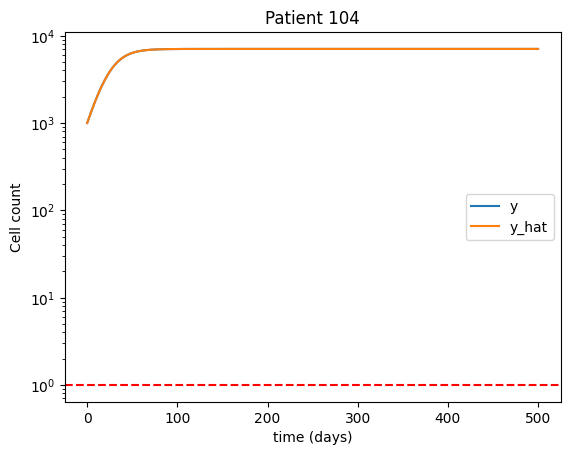

In [ ]:
# plot a simple simulation
fig, ax = plt.subplots()
chemo_start_times, chemo_end_times = cycles
plt.plot(t, results, label='y')
plt.plot(t, results_hat, label='y_hat')
plt.yscale('log')

for i, (start, end) in enumerate(zip(chemo_start_times, chemo_end_times)):
    label = None
    # the reason for the i=0 is so that we only have one thing in the legend, rather than a separate legend for every cycle.
    if i == 0:
        label = 'chemo'
    plt.fill_between([start, end], 0, 1, alpha=0.2, color='red',
                        label=label, transform=ax.get_xaxis_transform())
### Added This Part ###
plt.axhline(y = 1, color = 'r', linestyle = '--')
plt.title(f'Patient {patient_id}')
plt.xlabel('time (days)')
plt.ylabel('Cell count')
plt.legend()
plt.show()